In [1]:
import cv2
import os
from matplotlib import pyplot as plt

In [31]:
imagepaths = []
for dirname, _, filenames in os.walk('E:\Documents\Personal_Project\OpenCV'):
    for filename in filenames:
        imagepaths.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

E:\Documents\Personal_Project\OpenCV\gray.jpg
E:\Documents\Personal_Project\OpenCV\opencv.ipynb
E:\Documents\Personal_Project\OpenCV\video.avi
E:\Documents\Personal_Project\OpenCV\webcam_photo.jpg
E:\Documents\Personal_Project\OpenCV\Media\Better_Call_Saul.mp4
E:\Documents\Personal_Project\OpenCV\Media\Euler.jpeg
E:\Documents\Personal_Project\OpenCV\Media\Fight Club.jpeg


##### OpenCV Examples

In [29]:
# The path 'E:/Documents/Personal_Project/opencv-4.x'
# is the path to the folder where i have cloned the opencv 3.4 repository.

In [ ]:
# Histogram sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python hist.py

In [ ]:
# Image Matching sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python asift.py

In [ ]:
# Audio Spectogram sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python audio_spectrogram.py

In [ ]:
# High Resolution Image Navigation sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python browse.py # imagepath here

In [ ]:
# Live Video Color Tracking sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python camshift.py

In [ ]:
# Coherence-Enhancing Shock Filters sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python coherence.py

In [ ]:
# Live Video Histogram sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python color_histogram.py

In [ ]:
# Contours sample (Monkey Images)
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python contours.py

In [ ]:
# Linear/Circular PSF sample
!cd E:/Documents/Personal_Project/opencv-4.x/samples/python & python deconvolution.py

### Working with Images

In [32]:
img = cv2.imread(imagepaths[-1])
img.shape

(1440, 2560, 3)

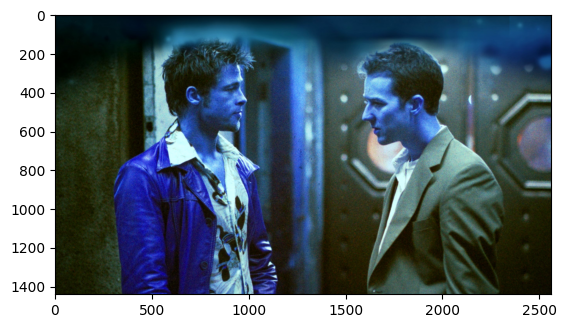

In [33]:
# cv2.imshow('image',img)
plt.imshow(img)

In [5]:
recolor = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [35]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

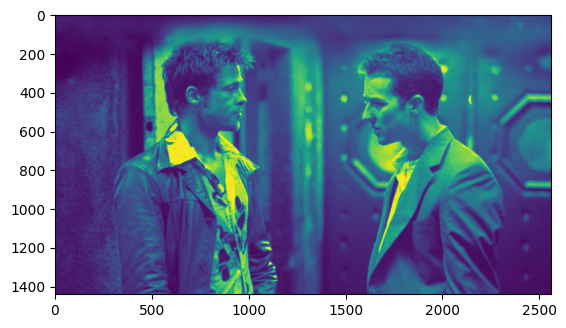

In [14]:
plt.imshow(gray)
plt.show()

In [38]:
# Write image to file in current working directory
cv2.imwrite('gray.jpg', gray)

True

### Working with Videos (Frames)

In [30]:
cap = cv2.VideoCapture(imagepaths[-3])

In [21]:
ret, frame = cap.read()

In [25]:
frame.shape

(1080, 864, 3)

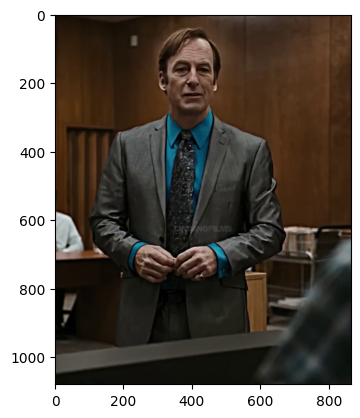

In [27]:
# Render Frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [37]:
cap.release()
cap.read()

(False, None)

In [36]:
cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

1080.0

In [35]:
# Video Length
cap.get(cv2.CAP_PROP_FRAME_COUNT)/cap.get(cv2.CAP_PROP_FPS)

59.62623333333333

### Working with Video (Captures)

In [5]:
### Reading Videos
vid = cv2.VideoCapture(imagepaths[-3])

for frame_idx in range(int(vid.get(cv2.CAP_PROP_FRAME_COUNT))):
    # vid.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    # Read frame
    ret, frame = vid.read()
    if ret:
        cv2.imshow('frame', frame)

        # Press x on keyboard to exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

# Release video and close windows
vid.release()
cv2.destroyAllWindows()

In [6]:
### Writing Videos
vid = cv2.VideoCapture(imagepaths[-3])

# Setup Video Writer
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = vid.get(cv2.CAP_PROP_FPS)

video_writer = cv2.VideoWriter(
                    'video.avi',
                    cv2.VideoWriter_fourcc(*'MJPG'),
                    fps, (width, height)
                    # isColor=False # for grayscale
                    )


for frame_idx in range(int(vid.get(cv2.CAP_PROP_FRAME_COUNT))):
    # vid.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)

    # Read frame
    ret, frame = vid.read()

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if ret:
        # Write frame to video
        cv2.imshow(' Gray frame', gray)
        video_writer.write(gray)

        # Press x on keyboard to exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

# Release video and close windows
vid.release()
cv2.destroyAllWindows()
# Release video writer
video_writer.release()

### Accessing Webcam and USB Devices

In [21]:
# Starts Webcam
cap = cv2.VideoCapture(0)

ret, frame = cap.read()

In [22]:
print(ret)

if ret:
    plt.imshow(frame)

True


In [24]:
cap.release()

In [25]:
def take_photo():
    cap = cv2.VideoCapture(0)

    ret, frame = cap.read()

    if ret:

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        cv2.imwrite('webcam_photo.jpg', frame)

    cap.release()

    return frame

In [ ]:
take_photo()

In [27]:
#Rendering in Real Time
cap = cv2.VideoCapture(0)

# Loop through each frame
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        cv2.imshow('Webcam', frame)

        # Press q on keyboard to exit
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

# Release video and close windows
cap.release()
cv2.destroyAllWindows()